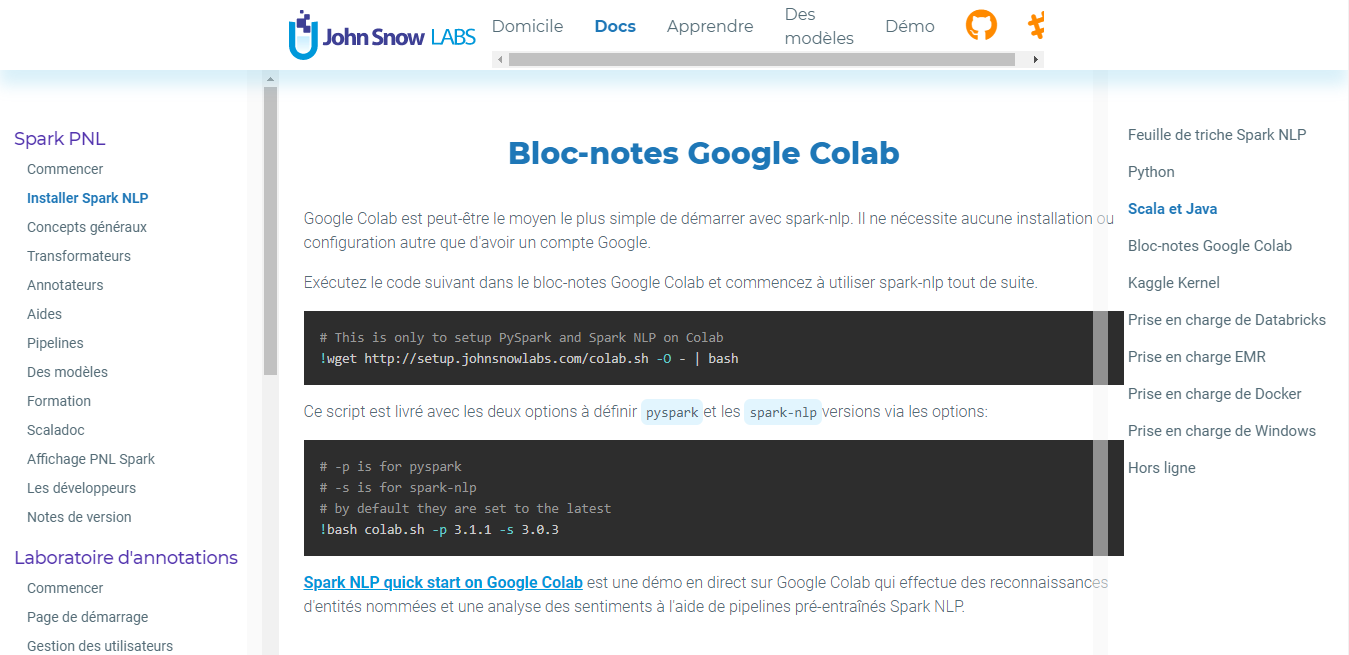

In [ ]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2021-05-14 11:52:45--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-05-14 11:52:45--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1608 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.57K  --.-KB/s    in 0s      

2021-05-14 11:52:45 (26.4 MB/s) - written to stdout [1608/1608]

setup Cola

1.   We start by importing the required modules.

In [ ]:
import sparknlp

In [ ]:
spark = sparknlp.start()

In [ ]:
print("Spark NLP version: ", sparknlp.version())
print("Apache Spark version: ", spark.version)

Spark NLP version:  3.0.3
Apache Spark version:  3.0.2


2.   Now, we load a pipeline model that contains the following annotators as a default:

    Tokenizer,
    Deep Sentence Detector,
    Lemmatizer,
    Stemmer,
    Part of Speech (POS),
    Context Spell Checker(NorvigSweetingModel),
    Word Embeddings (glove),
    NER-DL (trained by SOTA algorithm).

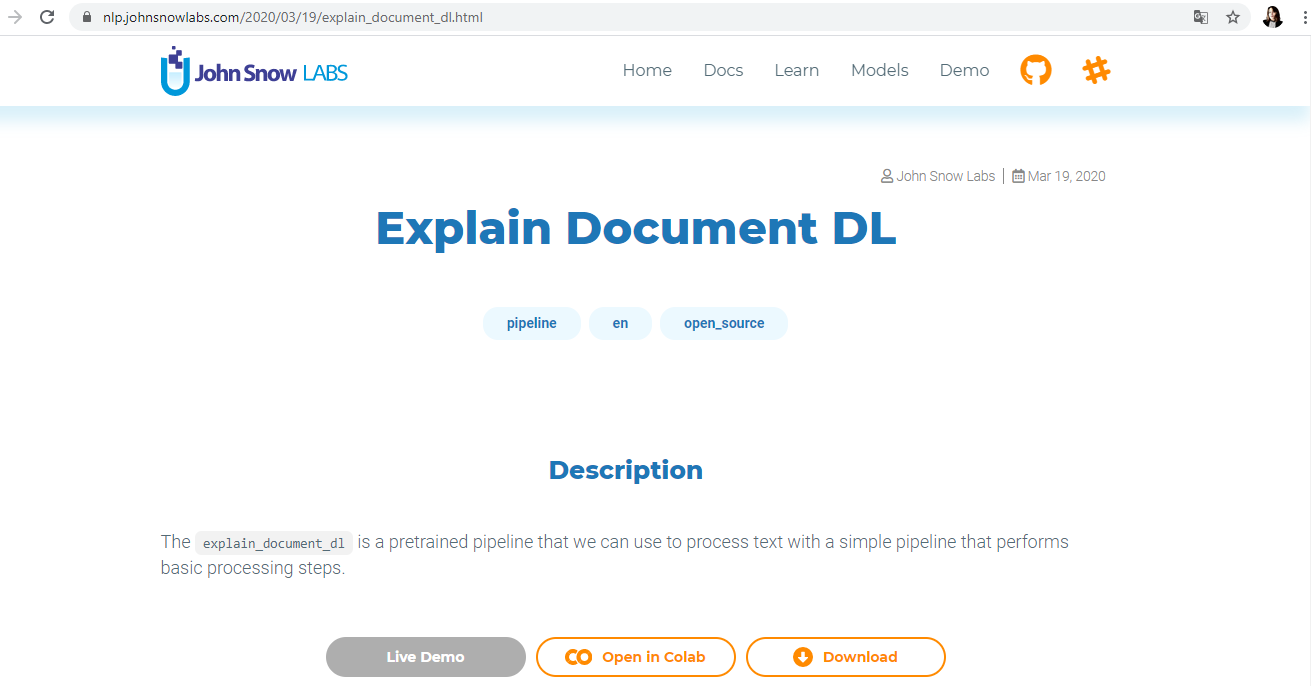

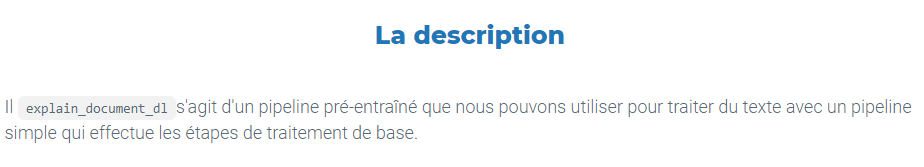

In [ ]:
from sparknlp.pretrained import PretrainedPipeline
from sparknlp.base import *

pipeline = PretrainedPipeline('explain_document_dl')

explain_document_dl download started this may take some time.
Approx size to download 169.3 MB
[OK!]


3.   We simply send the text we want to transform and the pipeline does the work.








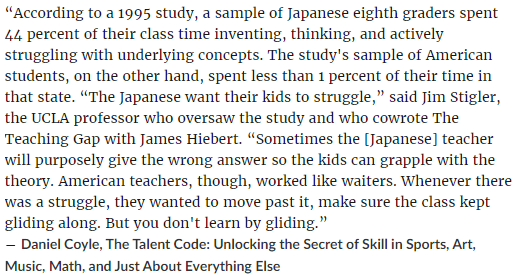

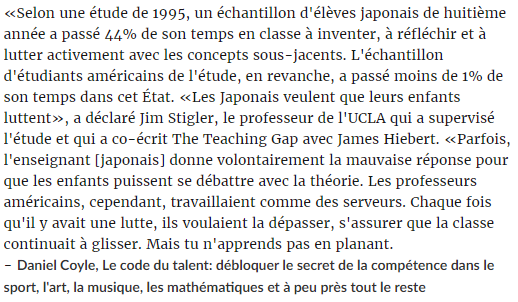

In [ ]:
text = "“According to a 1995 study, a sample of Japanese eighth graders spent 44 percent of their class time inventing, thinking, and actively struggling with underlying concepts. The study's sample of American students, on the other hand, spent less than 1 percent of their time in that state. “The Japanese want their kids to struggle,” said Jim Stigler, the UCLA professor who oversaw the study and who cowrote The Teaching Gap with James Hiebert. “Sometimes the [Japanese] teacher will purposely give the wrong answer so the kids can grapple with the theory. American teachers, though, worked like waiters. Whenever there was a struggle, they wanted to move past it, make sure the class kept gliding along. But you don't learn by gliding.” ― Daniel Coyle, The Talent Code"

In [ ]:
result = pipeline.annotate(text)

4.   We can see the output of each annotator below. 



In [ ]:
result['entities']

['Japanese',
 'American',
 'Japanese',
 'Jim Stigler',
 'UCLA',
 'The Teaching Gap',
 'James Hiebert',
 '[Japanese]',
 'American',
 'Daniel Coyle',
 'The Talent Code']

In [ ]:
result['sentence']

['“According to a 1995 study, a sample of Japanese eighth graders spent 44 percent of their class time inventing, thinking, and actively struggling with underlying concepts.',
 "The study's sample of American students, on the other hand, spent less than 1 percent of their time in that state.",
 '“The Japanese want their kids to struggle,” said Jim Stigler, the UCLA professor who oversaw the study and who cowrote The Teaching Gap with James Hiebert.',
 '“Sometimes the [Japanese] teacher will purposely give the wrong answer so the kids can grapple with the theory.',
 'American teachers, though, worked like waiters.',
 'Whenever there was a struggle, they wanted to move past it, make sure the class kept gliding along.',
 "But you don't learn by gliding.",
 '” ― Daniel Coyle, The Talent Code']

In [ ]:
import pandas as pd

df = pd.DataFrame(list(zip(result['token'],
                           result['stem'],
                           result['lemma'],
                           result['pos'],
                           result['checked'],
                           result['ner'])),
                  columns = ['token','stem','lemma', 'pos', 'spell_cheked', 'ner'])


In [ ]:
df

,token,stem,lemma,pos,spell_cheked,ner
0,“According,accord,According,VBG,According,O
1,to,to,to,TO,to,O
2,a,a,a,DT,a,O
3,1995,1995,1995,CD,1995,O
4,study,studi,study,NN,study,O
...,...,...,...,...,...,...
141,Coyle,coyl,Coyle,NNP,Coyle,I-PER
142,",",",",",",",",",",O
143,The,the,The,DT,The,B-ORG
144,Talent,talent,Talent,NNP,Talent,I-ORG


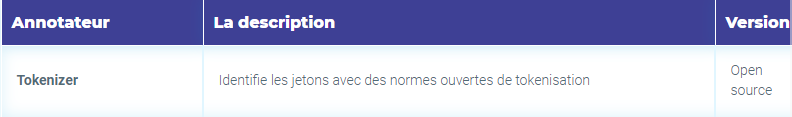

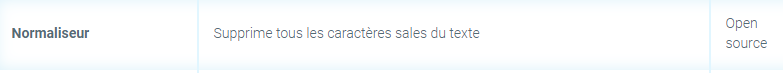

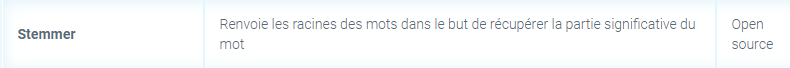

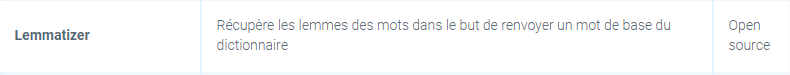

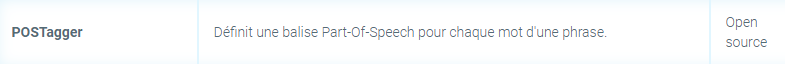

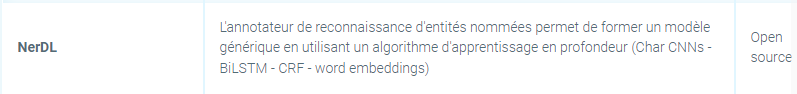

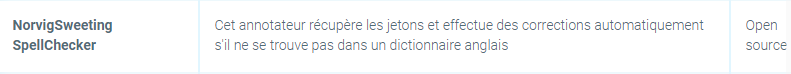